# Creating Graphs in R (Instructional Worksheet) 

## Basic Plot

We will use the built-in data set *lynx* to create plots in Python. This dataset provides the annual number of lynx trappings from 1821 - 1934 in Canada. This data is in the format of a time series, so let's first reformat the data as a dataframe before we start creating plots. We will create two columns, a year column (year), and a population (number of trappings) column (pop).  


In [2]:
from rpy2.robjects import r, pandas2ri
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def data(name):
    return pandas2ri.ri2py(r[name])

lynx = data('lynx')

In [3]:
ly = pd.DataFrame({'year' : np.arange(1821, 1935), 
                   'pop' : lynx})

In [4]:
ly.head()

,year,pop
0,1821,269.0
1,1822,321.0
2,1823,585.0
3,1824,871.0
4,1825,1475.0


Now, create a plot with year on the x-axis and population on the y-axis.

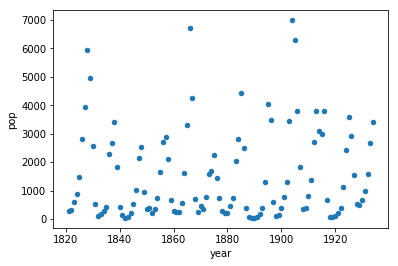

In [5]:
ly.plot('year', 'pop', kind='scatter')

What does this plot tell us?  

Right now, this plot is pretty chaotic and it is hard to see the pattern in the data.

Let's customize the plot to make it easier to read. There are many arguments that can be added to the plot command. Here are some examples:

* Kind - the kind of plot to be drawn (Lines(default) or Points)
* Title - the title of the plot
* Xlabel, Ylabel - the axis labels
* Xlim, Ylim - the range of values on each axis
* Color - color of symbols

Let's add these arguments to our lynx plot. Let's now make a line plot, instead of a point plot - add a title and axis labels - and change the color to blue. 



Text(0,0.5,'Population')

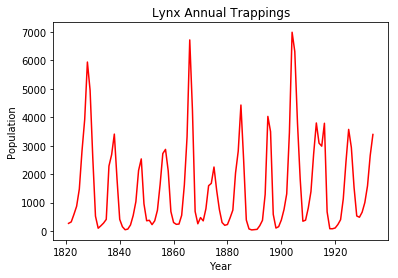

In [6]:
ly.plot('year', 'pop', kind='line', title='Lynx Annual Trappings', legend=False, color='r')
plt.xlabel('Year')
plt.ylabel('Population')

Now this plot is a lot easier to read. It can be seen that the population of lynx goes through cycles increasing then decreasing, etc. over this time period.


## Other Common Plots

## Barplot  

A barplot is a graphical way to display and compare the values of different categories within a dataset.  

Create a barplot for the following vector and add labels for each bar.  


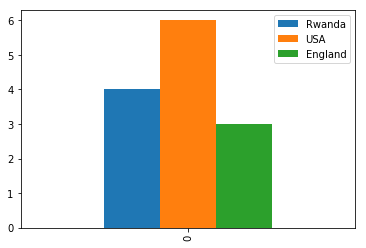

In [10]:
df = pd.DataFrame({"Rwanda" : [4], "USA" : [6], "England" : [3]})

df.plot.bar()

## Boxplot  

A boxplot shows the distribution of the data based on the five number summary: minimum, first quartile, median, third quartile, and maximum.  

Create a side-by- side boxplot for the *Loblolly* built-in dataset that we used in the previous module. 

In [15]:
Loblolly = data('Loblolly')

Loblolly.head()

/home/greg/anaconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


,height,age,Seed
0,4.51,3.0,301
1,10.89,5.0,301
2,28.72,10.0,301
3,41.74,15.0,301
4,52.70,20.0,301


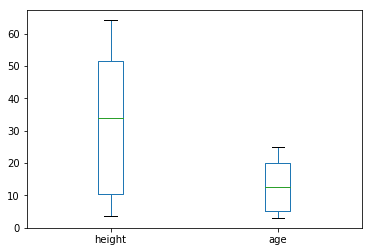

In [16]:
Loblolly.plot.box()

## Histogram  

A histogram is a graphical way to represent the distribution of a dataset. The bars represent the frequency of each value within the dataset.  

Create a histogram of the Loblolly pine height from the Loblolly dataset.  


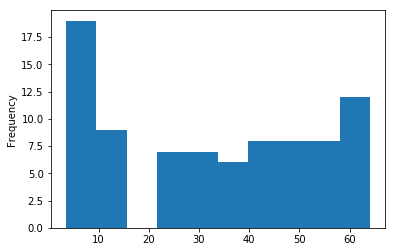

In [18]:
Loblolly['height'].plot.hist()

## Multiple Plots    

Let's explore a new dataset (ChickWeight) and use it to learn how to create multiple plots on the same page, as well as one plot with multiple sets of data. 

The *ChickWeight* data set provides data on the weight of 50 chicks over time. 

Create a line plot of the chick weight for chick 1 and chick 2 - make sure to include a title, axis labels, and make each plot a different color.


/home/greg/anaconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


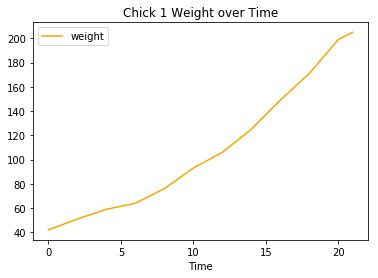

In [34]:
ChickWeight = data('ChickWeight')

ChickWeight[ChickWeight.Chick=='1'].plot.line(x='Time', 
                                              y='weight', 
                                              color='orange', 
                                              title='Chick 1 Weight over Time')

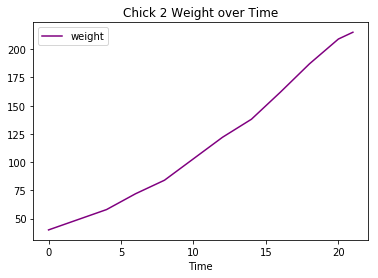

In [35]:
ChickWeight[ChickWeight.Chick=='2'].plot.line(x='Time', 
                                              y='weight', 
                                              color='purple', 
                                              title='Chick 2 Weight over Time')

Now, let's keep these same plots - but what if we want them both on the same page, for example for in a publication?

In [62]:
ChickWeight['Chick'] = pd.to_numeric(ChickWeight['Chick'])

AlteredChickWeight = ChickWeight[ChickWeight.Chick<3].pivot(index='Time', columns='Chick', values='weight')
AlteredChickWeight

Chick,1,2
Time,,
0.0,42.0,40.0
2.0,51.0,49.0
4.0,59.0,58.0
6.0,64.0,72.0
8.0,76.0,84.0
10.0,93.0,103.0
12.0,106.0,122.0
14.0,125.0,138.0
16.0,149.0,162.0


AttributeError: Unknown property subset

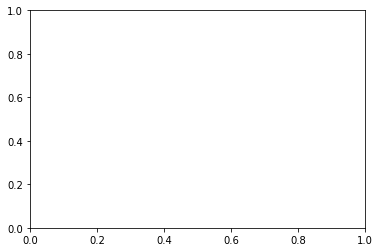

In [64]:
AlteredChickWeight.plot.line(subset=True)

## Multiple Sets of Data on the Same Plot & Legend  

Now, let's use the same data for the chicks, but create just one plot showing both sets of data. We will also include a legend to show which set of data relates to which chick. 

Now let's put the window back to one column and one row, and then create a plot of the chick 1 data in blue - the same way we created plots before.

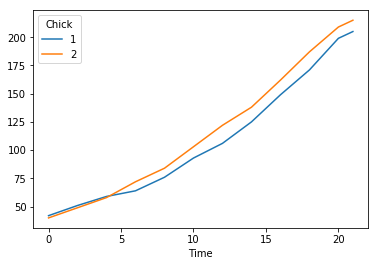

In [65]:
AlteredChickWeight.plot.line()

# Problem Set

1. For this problem set we are going to continue using the *ChickWeight* datset, but now we are interested in Chick 3 and Chick 4. If it is easier, you can create a new data frame for chick 3 and chick 4 to use in your plotting, or you can use the main data set and subset for the particular chick like we did above. 

2. Create a plot of the chick 3 weight with the time on the x-axis. Include a title, axis labels, and make the points blue. Can you figure out how to change the open circle points to another shape? Try and change them to closed circles. Is the weight increasing or decreasing over time? What is the minimum and maximum weight?

3. Create a plot of the chick 4 weight with the time on the x-axis. This time make it a line plot. Include a title, axis labels, and the make the line dark green. Can you figure out how to change the line type to a dotted line? What is the minimum and maximum weight?  

4. Put the two plots that you just made onto one page with one column and two rows.  

5. Create a line plot of the chick 3 weights. On the same plot add the chick 4 weights as points. Make the chick 3 line purple and the chick 4 points red. Includes a title and axis labels.

6. Add a legend to the top left of the plot you just made - make sure next to chick 3 you have a purple line, and next to chick 4 you have a red point.

7. Create a barplot showing the minimum weight for chick 3 and 4. Make sure to include a title and labels for each of the bars.  

8. Create a side-by- side boxplot of the weight for chick 3 and 4 - make sure to include a title, and a label below each box to show which animal it represents.  

9. Create a histogram of the weight for chick 3. Add an orange vertical line to show the mean weight.